# Assingment 1
## Student Performance Analysis using Decision Trees
## COMP-3703 (241551) Introduction to Artificial Intelligence
Santiago Pinto

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

from math import log2
from pprint import pprint as pp
from sklearn import tree
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 1. Loading Data & Basic Exploration

In [2]:
# Importing data
df = pd.read_csv("F:\RRC v2\Semester 3\Comp-3703\Assignments\Assignment 1\student-por.csv")

# Printing top 5 columns
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
# Printing dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

There are 649 rows, and 33 columns

## 2. Data Transformation

In [4]:
# Creating new column in dataframe
# Holds sum of three columns
df['total_mark'] = df['G1']+df['G2']+df['G3']

In [5]:
# Holds student pass or fail
pass_ = []

student_pass = 0
student_fail = 0

# Loops through total mark column
# and checks for pass or fail
for i in range(len(df)):
    
    # Assings grade to studen deoending on pass or fail
    if df['total_mark'][i] < 35:
        pass_.append(0)
        student_fail+=1
    else:
        student_pass+=1
        pass_.append(1)

# adds 'pass' column to dataframe
df['pass'] = pass_

print(str(student_pass) + ' Students passed\n'
      + str(student_fail) + ' Students failed')

328 Students passed
321 Students failed


In [6]:
# Drops columns
df.drop(columns=['G1', 'G2', 'G3', 'total_mark'], inplace=True)

# Printing top 5 columns
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [7]:
# Printing shape of dataframe to see if columns were dropped
df.shape

(649, 31)

There are still 649 rows, but there are now only 31 columns in the dataframe

There is a total of 649 students

328 students passed, and 321 students failed

I would say that the data is distributed fairly evenly, given the fact that basically half the students passed and half the students failed

## 3. One-Hot Encoding

In [8]:
# One hot encoding categorical columns
mylist =  pd.get_dummies(df, columns = ['school','sex', 'address', 'famsize'
                                        , 'Pstatus', 'Mjob', 'Fjob','reason'
                                        ,'guardian', 'schoolsup', 'famsup'
                                        , 'paid', 'activities', 'nursery'
                                        , 'higher', 'internet', 'romantic'])

# Sets True or False to 1 or 0
mylist =  mylist.astype(int)

In [9]:
# Printing out top 5 columns to see changes
mylist.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


## 4. Data Splitting

In [10]:
# Creating train and test split
k_folds = 5
sss = StratifiedShuffleSplit(n_splits=k_folds, test_size=0.229, random_state=42)

In [11]:
# Seperating targets and features
target = mylist[['pass']]
features = mylist.drop(columns='pass')

In [ ]:
# assings train and test data
for train_index, test_index in sss.split(features, target):
    
    # Train and test split for features
    x_train, x_test = features.iloc[train_index], features.iloc[test_index]
    
    # Train and test split for targets
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

## 5. Building the Decision Tree Model

In [13]:
# Creating initial desicion tree
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [ ]:
# Fitting training data to model
clf.fit(x_train,y_train)

In [ ]:
# Creating predictions for test data
prediction =  clf.predict(x_test)

# Calculating accuracy
acc_score = accuracy_score(prediction, y_test)

In [16]:
# Printing accuracy
print('The accuracy of this desicion tree is:', acc_score)

The accuracy of this desicion tree is: 0.7248322147651006


[Text(0.6493055555555556, 0.9166666666666666, 'failures <= 0.5\nentropy = 1.0\nsamples = 500\nvalue = [247, 253]\nclass = a'),
 Text(0.3541666666666667, 0.75, 'school_MS <= 0.5\nentropy = 0.985\nsamples = 430\nvalue = [184, 246]\nclass = a'),
 Text(0.1527777777777778, 0.5833333333333334, 'Walc <= 3.5\nentropy = 0.922\nsamples = 297\nvalue = [100, 197]\nclass = a'),
 Text(0.08333333333333333, 0.4166666666666667, 'higher_no <= 0.5\nentropy = 0.843\nsamples = 236\nvalue = [64, 172]\nclass = a'),
 Text(0.05555555555555555, 0.25, 'schoolsup_yes <= 0.5\nentropy = 0.82\nsamples = 231\nvalue = [59, 172]\nclass = a'),
 Text(0.027777777777777776, 0.08333333333333333, 'entropy = 0.753\nsamples = 199\nvalue = [43, 156]\nclass = a'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 1.0\nsamples = 32\nvalue = [16, 16]\nclass = p'),
 Text(0.1111111111111111, 0.25, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = p'),
 Text(0.2222222222222222, 0.4166666666666667, 'sex_M <= 0.5\nentropy =

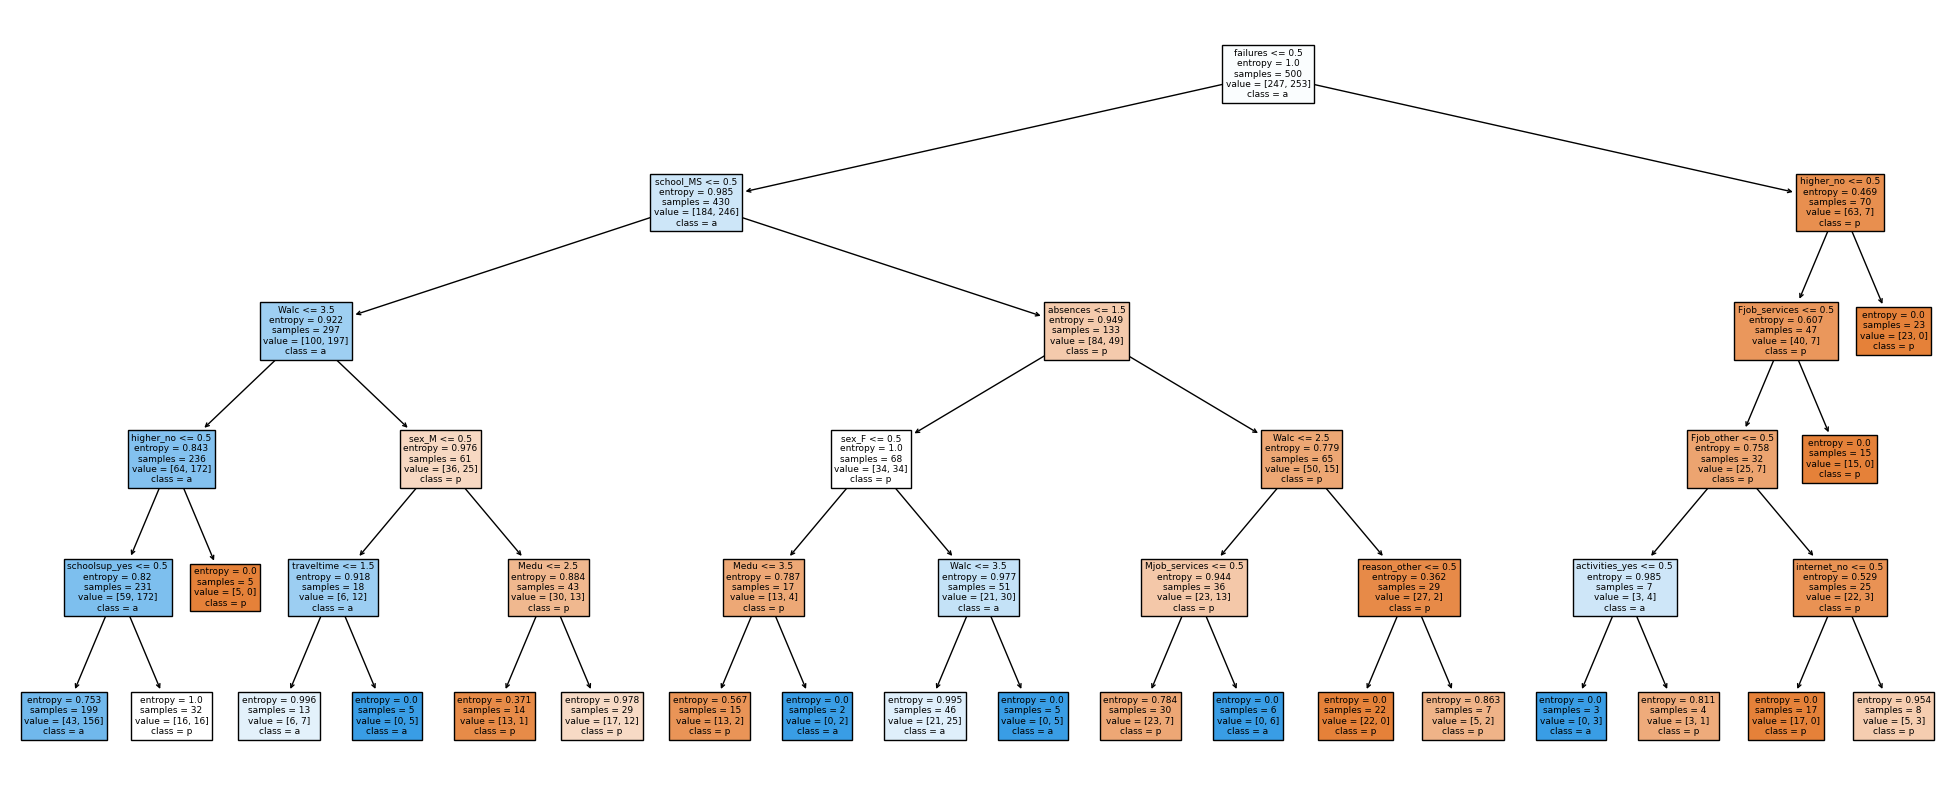

In [17]:
# Plotting out decision tree
plt.figure(figsize=(25,10))
tree.plot_tree(clf,
               feature_names=features.columns,
               class_names='pass',
               filled=True)

According to my tree, the top two level splitting features are school_MS, and higher_no

Gini impurity would be appropriate for this given that we are doing binary classification

## 6. Model Evaluation using Cross-Validation

In [ ]:
# Cacluating cross validation
accuracy_scores = cross_val_score(clf, features, target, cv=sss, scoring='accuracy')

In [19]:
# Prints accuracy and variance for initial model
print(f"The mean accuracy is:  {accuracy_scores.mean(): .4f}\nThe variance is (+/-): {accuracy_scores.std(): .4f}\n ")

The mean accuracy is:   0.6993
The variance is (+/-):  0.0143
 


An accuarcy metric is appropriate because it allows us to see how well the model is performing on all data sets. Without it we would only have the variance to go off of when evalutaing a model

## 7. Hyperparameter Tuning

In [20]:
# random that will pick 1 or 0
# will be gini or entropy
def rand():
    return random.randint(0,1)

In [ ]:
# Empty lists 
acc_temp = []

# two criterions
criterion = ['entropy', 'gini']

# Ensuring rnadom output will be the same eberytime
random.seed(1)
random.shuffle(criterion)

# Creates 20 models with a depth ranging 
# from 1-20
for _ in range(1,21):
    clf = DecisionTreeClassifier(criterion=criterion[rand()],max_depth=_)
    clf.fit(x_train, y_train)
    
    accuracy_scores = cross_val_score(clf, features, target, cv=sss, scoring='accuracy')
    acc_temp.append(f"Max depth: {_}, Accuracy:{accuracy_scores.mean()*100: .2f}% Variance (+/-):{accuracy_scores.std()*100: .2f}, Criterion: {criterion[rand()]}")

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=5).fit(x_train,y_train)

In [ ]:
# Creating predictions for test data
prediction =  clf.predict(x_test)

# Calculating accuracy
acc_score = accuracy_score(prediction, y_test)

[Text(0.6493055555555556, 0.9166666666666666, 'failures <= 0.5\ngini = 0.5\nsamples = 500\nvalue = [247, 253]\nclass = a'),
 Text(0.3541666666666667, 0.75, 'school_MS <= 0.5\ngini = 0.49\nsamples = 430\nvalue = [184, 246]\nclass = a'),
 Text(0.1527777777777778, 0.5833333333333334, 'Walc <= 3.5\ngini = 0.447\nsamples = 297\nvalue = [100, 197]\nclass = a'),
 Text(0.08333333333333333, 0.4166666666666667, 'higher_no <= 0.5\ngini = 0.395\nsamples = 236\nvalue = [64, 172]\nclass = a'),
 Text(0.05555555555555555, 0.25, 'schoolsup_yes <= 0.5\ngini = 0.38\nsamples = 231\nvalue = [59, 172]\nclass = a'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.339\nsamples = 199\nvalue = [43, 156]\nclass = a'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.5\nsamples = 32\nvalue = [16, 16]\nclass = p'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = p'),
 Text(0.2222222222222222, 0.4166666666666667, 'sex_M <= 0.5\ngini = 0.484\nsamples = 61\nvalue 

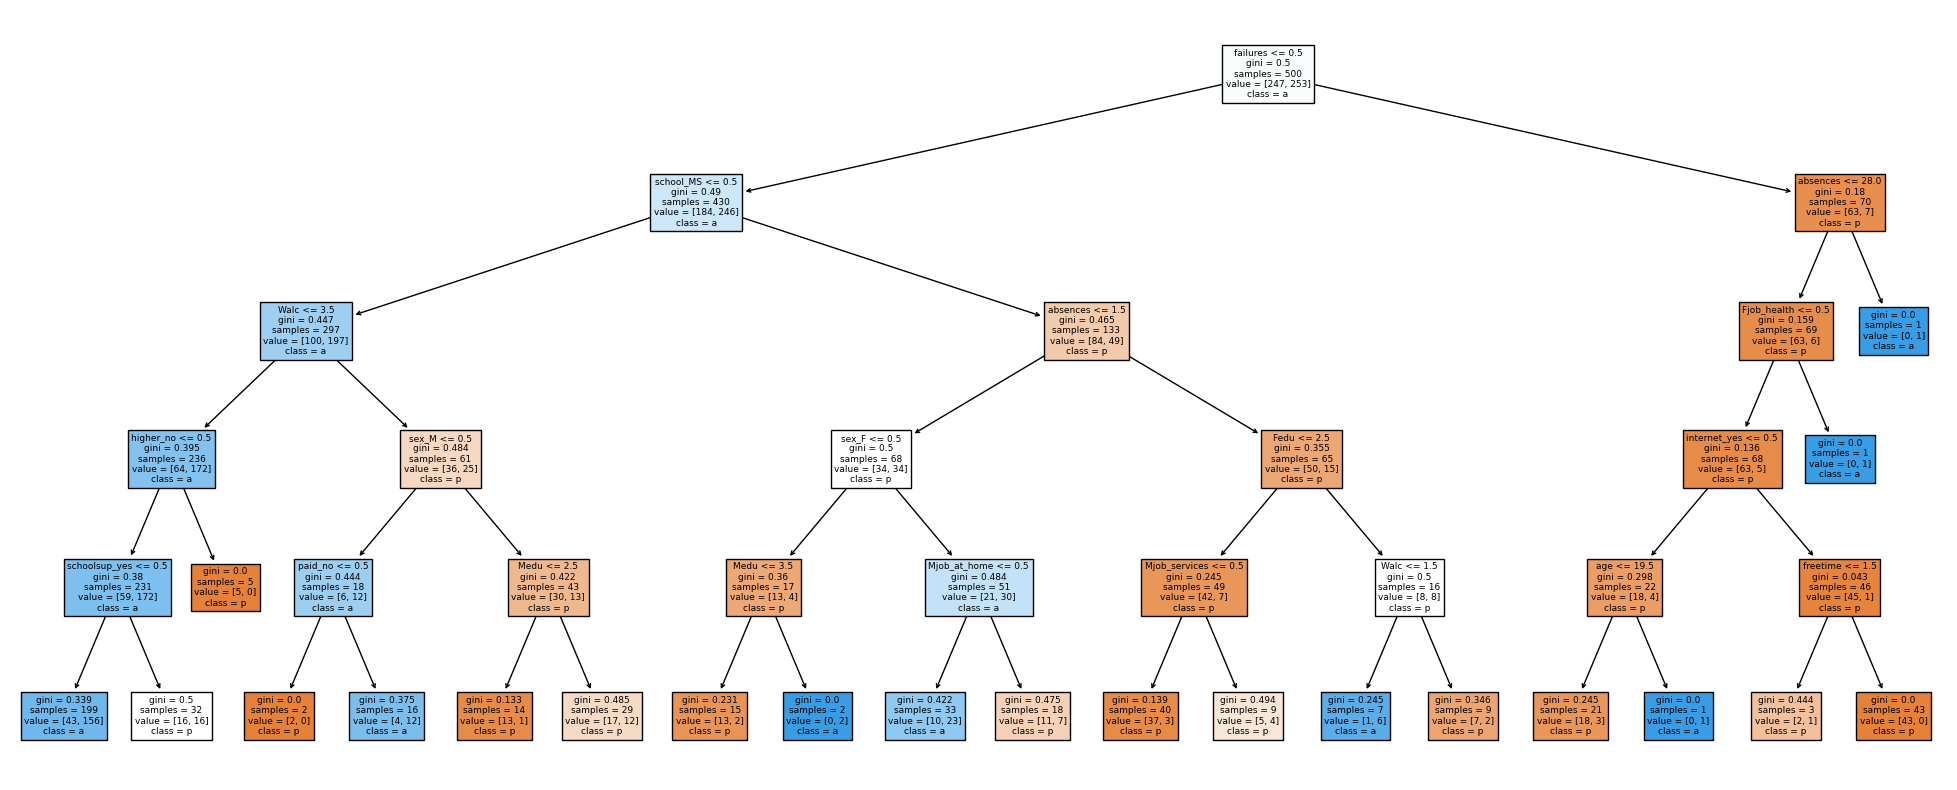

In [40]:
# Plotting out decision tree
plt.figure(figsize=(25,10))
tree.plot_tree(clf,
               feature_names=features.columns,
               class_names='pass',
               filled=True)

In [43]:
# Printing accuracy
print('The accuracy of this desicion tree is:', acc_score)

The accuracy of this desicion tree is: 0.738255033557047


Only one of the two top splitting features changed, absences has replaced higher_no

And the accuracy appears to be 1% higher than entropy

In [22]:
# Prints all 20 models, their depth, criterion, accuracy and variance
pp(acc_temp)

['Max depth: 1, Accuracy: 66.44% Variance (+/-): 2.25, Criterion: entropy',
 'Max depth: 2, Accuracy: 68.46% Variance (+/-): 0.85, Criterion: entropy',
 'Max depth: 3, Accuracy: 68.86% Variance (+/-): 1.62, Criterion: entropy',
 'Max depth: 4, Accuracy: 71.01% Variance (+/-): 2.53, Criterion: gini',
 'Max depth: 5, Accuracy: 69.40% Variance (+/-): 3.46, Criterion: entropy',
 'Max depth: 6, Accuracy: 71.28% Variance (+/-): 2.66, Criterion: entropy',
 'Max depth: 7, Accuracy: 69.66% Variance (+/-): 2.30, Criterion: gini',
 'Max depth: 8, Accuracy: 70.47% Variance (+/-): 3.47, Criterion: entropy',
 'Max depth: 9, Accuracy: 65.91% Variance (+/-): 5.44, Criterion: gini',
 'Max depth: 10, Accuracy: 69.40% Variance (+/-): 2.57, Criterion: gini',
 'Max depth: 11, Accuracy: 67.52% Variance (+/-): 6.40, Criterion: gini',
 'Max depth: 12, Accuracy: 68.72% Variance (+/-): 2.90, Criterion: entropy',
 'Max depth: 13, Accuracy: 68.99% Variance (+/-): 2.60, Criterion: entropy',
 'Max depth: 14, Accura

Looking at these results, the best depth for this model is around 4-8. After raching that depth the models got worse and worse accuracy scores

## 8. Entropy and Gini

In [23]:
# Creating test cases
array_1 = np.array([1,2,2,3,3,3])
array_2 = np.array([1,1,1,1,1,1,1,1,1,1])
array_3 = np.array([2,3])

In [24]:
# Creating fucntion to find entropy
def entropy(ent: np.array):
    
    # splits array into unique values and the count of them
    _, count = np.unique(ent, return_counts = True)
    
    # finding p1
    counter = count / len(ent)

    # finding p2
    temp = len(ent) - count
    counter_2 = temp/len(ent)

    # Calculating entropy
    Entropy = -np.sum(counter * np.log2(counter)+ counter_2 * np.log2(counter_2))
    
    # Returns entropy
    return Entropy

In [25]:
# Printing entropy
print('The entropy of the list 1:% 3f' % entropy(array_1))
print('The entropy of the list 2:% 3f' % entropy(array_2))
print('The entropy of the list 3:% 3f' % entropy(array_3))

The entropy of the list 1: 2.568318
The entropy of the list 2: nan
The entropy of the list 3: 2.000000


C:\Users\Santiago Pinto\AppData\Local\Temp\ipykernel_19460\1275926315.py:15: RuntimeWarning: divide by zero encountered in log2
  Entropy = -np.sum(counter * np.log2(counter)+ counter_2 * np.log2(counter_2))
C:\Users\Santiago Pinto\AppData\Local\Temp\ipykernel_19460\1275926315.py:15: RuntimeWarning: invalid value encountered in multiply
  Entropy = -np.sum(counter * np.log2(counter)+ counter_2 * np.log2(counter_2))


In [36]:
# Creating function to find Gini 
def gini(gin: np.array):
    
    # splits array into unique values and the count of them
    _, count = np.unique(gin, return_counts = True)
    
    # initial sum for gini
    sum_g = 0
    
    # calculating p1
    sum_g = np.sum(sum_g + count/len(gin)*count/len(gin))
    
    # Calculating gini
    gini = 1 - sum_g
    
    # Returns gini
    return gini

In [37]:
# Printing out Gini
print('Gini of the list 1:% 2f' % gini(array_1))
print('Gini of the list 2:% 2f' % gini(array_2))
print('Gini of the list 3:% 2f' % gini(array_3))

Gini of the list 1: 0.611111
Gini of the list 2: 0.000000
Gini of the list 3: 0.500000
